<a href="https://colab.research.google.com/github/MarkovicMartin/GITCourse/blob/main/Image_processing_tasks_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Uložení obrázku do pracovního prostoru
lipa_path = 'https://upload.wikimedia.org/wikipedia/commons/5/50/%C4%8Cesk%C3%A1_L%C3%ADpa_n%C3%A1m%C4%9Bst%C3%AD_2.JPG'
!wget -O lipa.jpg {lipa_path}
map_path = 'https://svetubytovani.cz/maptiles/tile/14/8812/5621.png'
!wget -O map.png {map_path}

--2022-11-29 06:49:00--  https://upload.wikimedia.org/wikipedia/commons/5/50/%C4%8Cesk%C3%A1_L%C3%ADpa_n%C3%A1m%C4%9Bst%C3%AD_2.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1173995 (1.1M) [image/jpeg]
Saving to: ‘lipa.jpg’

lipa.jpg            100%[===================>]   1.12M  --.-KB/s    in 0.08s   

2022-11-29 06:49:00 (14.6 MB/s) - ‘lipa.jpg’ saved [1173995/1173995]

--2022-11-29 06:49:00--  https://svetubytovani.cz/maptiles/tile/14/8812/5621.png
Resolving svetubytovani.cz (svetubytovani.cz)... 217.16.185.128
Connecting to svetubytovani.cz (svetubytovani.cz)|217.16.185.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19302 (19K) [image/png]
Saving to: ‘map.png’

map.png             100%[===================>]  18.85K  --.-KB/s    in 0.1s    

2022-11-29 

#Task 1 - ořez a uložení
 

1.   Načtěte obrázek 'lipa.jpg'  ---- *nápověda: cv2.imread*
2.   Obrázek zmenšete na velikost 200,200  ---- *nápověda: cv2.resize*
3.   Z obrázku ořízněnte okraj 50 px ze všech stran  ---- *nápověda: numpy slicing*
4.   Obrázek uložte jako 'lipa_cut.jpg  ----  *nápověda: cv2.imwrite*

Výsledek:

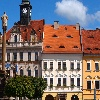






(200, 200, 3)


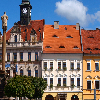

In [7]:
#TASK 1
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('lipa.jpg')
img = cv2.resize(img, (200,200)).astype(np.float32)
print(img.shape)
img_cut = img [50:-50,50:-50]
cv2.imwrite("lipa_cut.jpg",img_cut)
cv2_imshow(img_cut)

#Task 2 - šedotónová
 

1.   Načtěte obrázek 'lipa.jpg' ---- *nápověda: cv2.imread*
2.   Obrázek konvertujte z BGR prostoru do HSV  ---- *nápověda: cv2.cvtColor  ; COLOR_BGR2HSV*
3.   Z obrázku ponechte pouze třetí ('Value') kanál  ---- *nápověda img[:,:,2]*
4.   Velikost obrázku snižte na desetinu v obou osách ---- *nápověda cv2.resize; fx a fy*
4.   Výsledek si zobrazte pomocí funkce cv2_imshow  ---- *jak importovat lze najít jako první odkaz při vygooglení*

Výsledek:

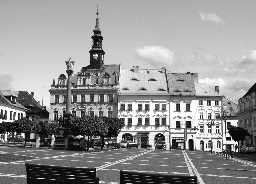


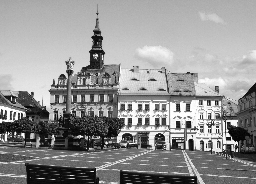

In [8]:
#TASK2

img = cv2.imread('lipa.jpg')
HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype(np.float32)
img = HSV [:,:,2]
small = cv2.resize(img, (0,0), fx=0.1, fy=0.1) 
  
from google.colab.patches import cv2_imshow
cv2_imshow(small)

#Task 3 - segmentace vody


1.   Načtěte obrázek 'map.png' 
2.   Obrázek načtěte pomocí cv2_imshow
3.   Zkonvertujte do barvného prostoru HSV
4.   Vytvoře binární (hodnoty 0/1) masku aplikováním thresholdu na první kanál ('Hue'). Hodnotu threshodlu nastavte na 63.
5.   Maskou vynásobte druhý kanál ('Saturation') obrázku. Mask má mít hodnoty 0 nebo 1. Pokud je v masce '0', tak tím saturaci v daném bodu vynulujeme. Pokud má maska v daném bodě hodnotu '1', tak saturace v daném bodu zůstane.
6.   Obrázek převeďte zpět z HSV prostoru do BGR
7.   Obrázek zobrazte pomocí cv2_imshow

Výsledek:

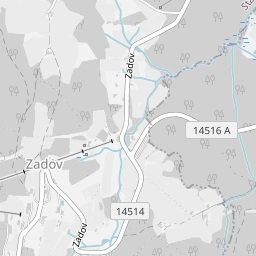


In [ ]:
#TASK3
map = cv2.imread("map.png")
mapHSV = cv2.cvtColor(map, cv2.COLOR_BGR2HSV)

In [ ]:
retval, mask= cv2.threshold(mapHSV[:,:,0], 63, 1, cv2.THRESH_BINARY)
mapHSV[:,:,1]*=mask

In [ ]:
mapbgr = cv2.cvtColor(mapHSV, cv2.COLOR_HSV2BGR)

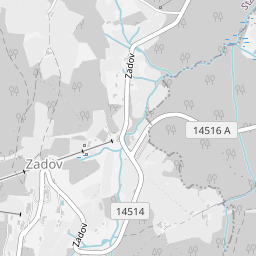

In [ ]:
cv2_imshow(mapbgr)

#Task 4 - kopírování kódu ze stack overflow

1.   Načtěte snímek *map.png*
2.   Orotujte snímek o 30° kolem bodu (40,10). (Návod je na https://stackoverflow.com/questions/9041681/opencv-python-rotate-image-by-x-degrees-around-specific-point
3.   Snímek zobrazte pomocí cv2_imshow

Výsledek:

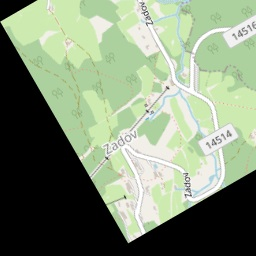




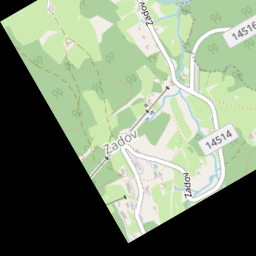

In [ ]:
#TASK 4
map = cv2.imread("map.png")
def rotate_image(image, angle):
  image_center = [40,10]
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result
rotate_map = rotate_image(map,30)

cv2_imshow(rotate_map)

#Task 5 - jednoduchá neuronová síť

1.   Načtěte data z datasetu mnist (pozor, nikoli CIFAR10)
2.   Vytvořte malou konvoluční neuronovou síť (maximálně 10000 parametrů). Počet parametrů lze ověřit pomocí model.summary()
3.   Dosáhněte na validační sadě accuracy > 97% během tří epoch.

Nápověda: https://www.tensorflow.org/tutorials/images/cnn

Referenční řešení má 16 řádků, není potřeba psát mnoho kódu.




#Task 5
from keras.models import Model
from keras.applications import DenseNet121
from keras.utils import to_categorical
from keras.datasets import mnist
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization, Dense



In [ ]:
#Task 5
from keras.models import Model
from keras.applications import DenseNet121
from keras.utils import to_categorical
from keras.datasets import mnist
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization, Dense


(train_x, train_y ), (test_x, test_y) = datasets.mnist.load_data()
# 0-255 to 0-1
train_x = train_x/ 255
test_x = test_x/ 255
# Change the labels from integer to categorical data
train_y_one_hot = to_categorical (train_y)
test_y_one_hot = to_categorical (test_y)

model = models.Sequential ()
model.add (layers.Conv2D(16, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform' ,
padding= 'same', input_shape=(28, 28, 1)))


model.add (layers.Conv2D(16, (3, 3), activation= 'relu'))
model.add (layers.BatchNormalization())
model.add (layers.MaxPooling2D ((2, 2)))

model.add (layers.Conv2D(16, (3, 3), activation= 'relu'))
model.add (layers.BatchNormalization())

model.add (layers.Conv2D(16, (3, 3), activation= 'relu'))
model.add (layers.BatchNormalization())
model.add (layers.MaxPooling2D ((2, 2)))

model.add (layers.Flatten())

model.add (Dense(10, activation= 'softmax' ))
model.summary()

# compile model
opt = tf.keras.optimizers.SGD (lr=0.001, momentum= 0.9)
model.compile(optimizer=opt , loss='categorical_crossentropy' ,
metrics= ['accuracy' ])
# fit model
history = model.fit (train_x, train_y_one_hot , epochs= 3, batch_size= 64,
 validation_data= (test_x, test_y_one_hot ), verbose= 1)
# evaluate model
_, acc = model.evaluate (test_x, test_y_one_hot , verbose= 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        2320      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 16)       6

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/3
938/938 [==============================] - 82s 87ms/step - loss: 0.2991 - accuracy: 0.9146 - val_loss: 0.1121 - val_accuracy: 0.9678
Epoch 2/3
938/938 [==============================] - 82s 87ms/step - loss: 0.0985 - accuracy: 0.9711 - val_loss: 0.0760 - val_accuracy: 0.9769
Epoch 3/3
313/313 [==============================] - 4s 12ms/step - loss: 0.0637 - accuracy: 0.9808


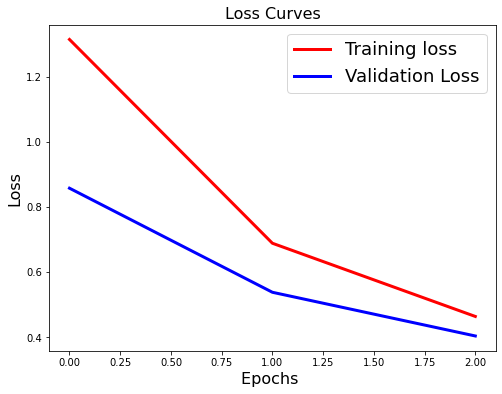

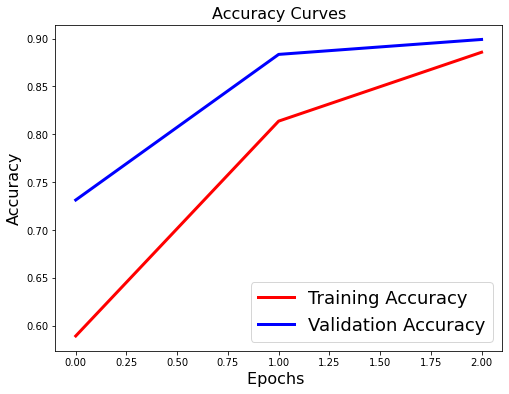

In [ ]:
def plot_history(history):
#Plot the Loss Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['loss'],'r',linewidth=3.0)
 plt.plot(history.history['val_loss'],'b',linewidth=3.0)
 plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Loss',fontsize=16)
 plt.title('Loss Curves',fontsize=16)
#Plot the Accuracy Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
 plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
 plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Accuracy',fontsize=16)
 plt.title('Accuracy Curves',fontsize=16)
plot_history(history)